In [2]:
import pandas as pd
import numpy as np
import re
import os
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
import dtale
warnings.filterwarnings('ignore')
min_max_scaler = MinMaxScaler()


In [3]:
features = pd.read_csv("intermediates/all_data_vectors_reduced.csv")
features

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,20.758766,4.152176,9.010704,-9.669107,2.509837,4.923232,-1.923087,0.399715,1.366774,2.573776,...,-0.765496,1.637811,0.163487,-0.351419,0.256502,-0.958412,-0.494208,0.703505,2.017622,-1.100046
1,16.853424,1.633149,2.639582,5.146177,2.930844,-5.198558,-6.906621,6.016510,-6.534919,0.107996,...,2.477393,-1.454701,-0.895967,1.390970,-3.337917,-0.547519,0.075605,-1.320745,0.801488,0.914203
2,19.990581,14.102535,-0.048741,-7.390513,6.196505,-1.999968,-4.001506,0.703902,4.615056,4.641004,...,-0.350081,0.507976,0.789608,1.530523,0.733403,-1.308203,0.185998,-0.711058,-0.181740,1.902839
3,18.352940,21.673649,-6.672807,4.814432,-2.720196,-0.963665,-4.611256,3.388501,-3.502063,-2.549371,...,-2.700383,1.044953,-0.318104,-0.442456,1.367205,1.578252,0.829829,1.337963,0.808738,1.955890
4,19.322534,10.090267,5.615598,-0.088242,-11.637131,-7.043906,5.955014,3.993131,-3.439438,-2.242519,...,0.014823,-1.153060,0.141511,-0.495206,-0.842129,-0.649194,0.068512,-0.358808,1.945069,0.257230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,-7.845455,-0.171377,-0.173387,-0.075186,-0.312437,0.134232,-0.112815,0.000144,-0.222887,0.055109,...,0.027356,0.046758,0.023548,-0.052294,0.030900,0.001592,-0.028294,-0.020025,0.043244,-0.131534
13172,-7.790591,-0.186185,-0.177495,-0.077578,-0.287627,0.126204,-0.076642,-0.011969,-0.181625,0.059126,...,0.046232,-0.058845,0.003956,-0.067685,0.096082,-0.102151,0.078382,0.040622,-0.069893,-0.060271
13173,-7.787303,-0.167594,-0.161861,-0.066915,-0.271351,0.108070,-0.102292,0.008056,-0.185891,0.034858,...,0.056117,-0.130998,-0.005557,-0.178687,0.320295,-0.208149,0.183112,0.016742,-0.014694,-0.157889
13174,-7.790596,-0.156289,-0.141872,-0.078985,-0.266985,0.106806,-0.105060,0.004222,-0.164564,0.022681,...,0.081269,-0.231262,-0.045846,-0.336186,0.542730,-0.249579,0.288774,0.006911,-0.016176,-0.111735


# COMPUTING THE OPTIMAL KMEANS CLUSTERING K VALUE

KMeans is a simaple yet effective way to cluster attributes based due to its runtime computational complexity of O(m); m=#nodes

Ref: https://developers.google.com/machine-learning/clustering/clustering-algorithms


## USING ELBOW METHOD

In [4]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    print("FOR k = ",k)
    kmeanModel = KMeans(n_clusters=k).fit(features)
    kmeanModel.fit(features)
 
    distortions.append(sum(np.min(cdist(features, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / features.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(features, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / features.shape[0]
    mapping2[k] = kmeanModel.inertia_

FOR k =  1
FOR k =  2
FOR k =  3
FOR k =  4
FOR k =  5
FOR k =  6
FOR k =  7
FOR k =  8
FOR k =  9
FOR k =  10
FOR k =  11
FOR k =  12
FOR k =  13
FOR k =  14


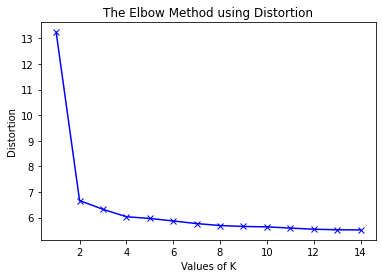

In [5]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()
